# Kaggle data set w/ spectral centroid

In [53]:
import pandas as pd

# using the kaggle csv
df = pd.read_csv('music_feats.csv')
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


### What the heck is a spectral centroid? 
According to our [dataset](https://www.kaggle.com/datasets/insiyeah/musicfeatures), the spectral centroid "Indicates where the "center of mass" of the spectrum is located". [Other definitions](https://commons.lib.jmu.edu/cgi/viewcontent.cgi?article=1524&context=master201019#:~:text=The%20spectral%20centroid%20can%20be,multiples%20of%20the%20fundamental%20frequency) also include something along the lines of a spectral centroid being "the mean of all the amplitude-weighted frequencies in a sound, including the fundamental frequency and corresponding harmonics". 

Now, our other feature, tempo, is much easier to understand-- it's just how many beats per minute are we playing this song at? How fast/slow is the song, etc. 

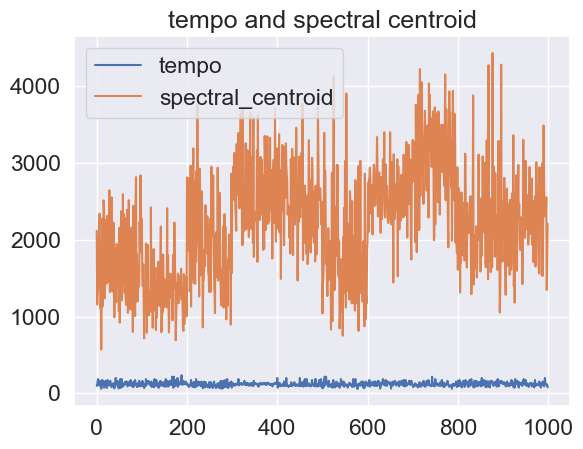

In [47]:
x_lin = df.loc[:, 'tempo'].values
y_lin = df.loc[:, 'spectral_centroid'].values
plt.plot(x_lin, label = 'tempo')
plt.plot(y_lin, label = 'spectral_centroid')
plt.title("tempo and spectral centroid")
plt.legend()


This is a very.. interesting graph

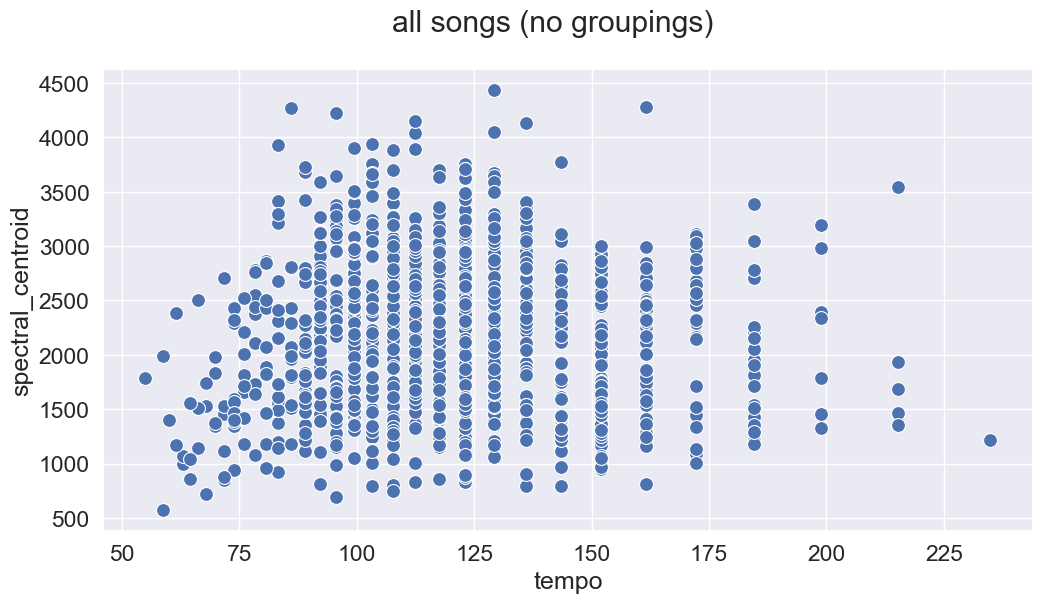

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)

# df_penguin = sns.load_dataset('penguins')
# df_penguin.dropna(axis=0, how='any', inplace=True)

sns.scatterplot(data=df, x='tempo', y='spectral_centroid', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('all songs (no groupings)');

Why are there so many near-perfect vertical lines? 

c:\Users\alina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\alina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\alina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\alina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Text(0.5, 0.98, 'Change in mean distance from cluster per k value')

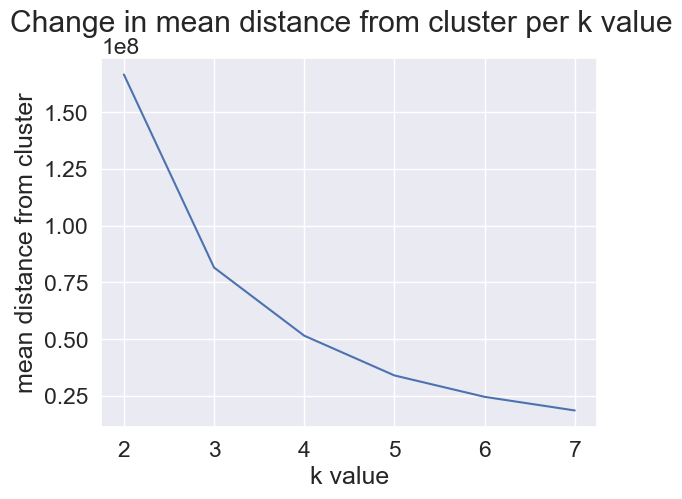

In [49]:
from sklearn.cluster import KMeans
n_clusters = 3

x_feat_list = ['tempo', 'spectral_centroid']
x = df.loc[:, x_feat_list].values

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)

# keys are k (number of clusters), values are mean_d (mean distance
# from each sample to its cluster centroid)
mean_d_dict = dict()
for n_clusters in range(2, 8):
    # fit kmeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)    
        
    # compute & store mean distance
    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d

plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.ylabel("mean distance from cluster")
plt.xlabel("k value")
plt.suptitle("Change in mean distance from cluster per k value") 

In [50]:
# k in k-means describes the number of clusters
n_clusters = 5

# extract x features (define distance between samples)
x_feat_list = ['tempo', 'spectral_centroid']
x = df.loc[:, x_feat_list].values

# perform clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)

c:\Users\alina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0.5, 0.98, 'clusters of songs (similar beats and spectral bandwidth)')

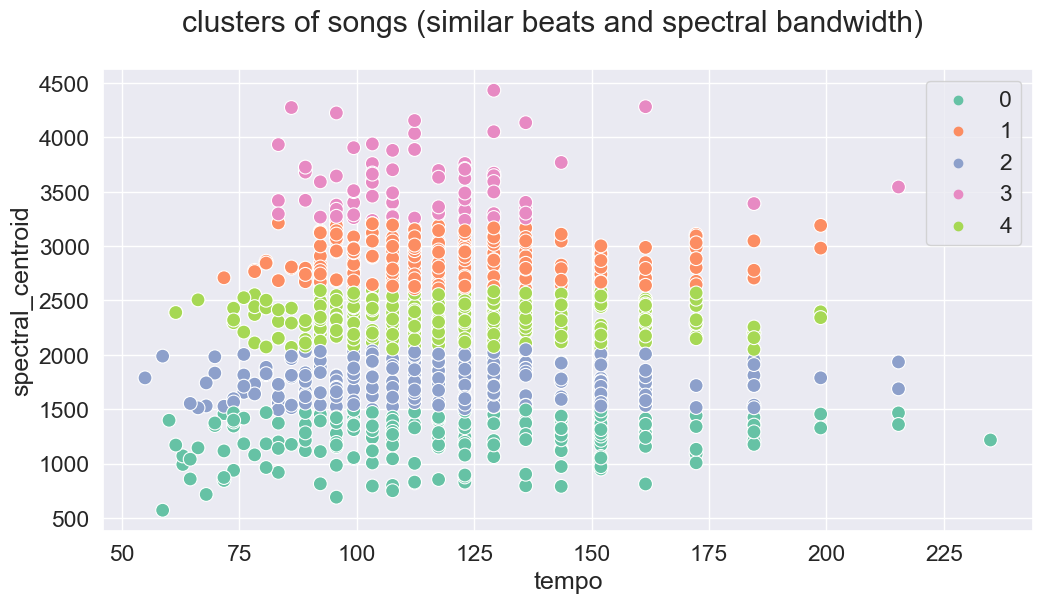

In [51]:
sns.scatterplot(data=df, x='tempo', y='spectral_centroid', s=100, hue=y, palette='Set2')
plt.gcf().set_size_inches(12, 6)
plt.suptitle('clusters of songs (similar beats and spectral bandwidth)')

Text(0.5, 0.98, 'actual genres')

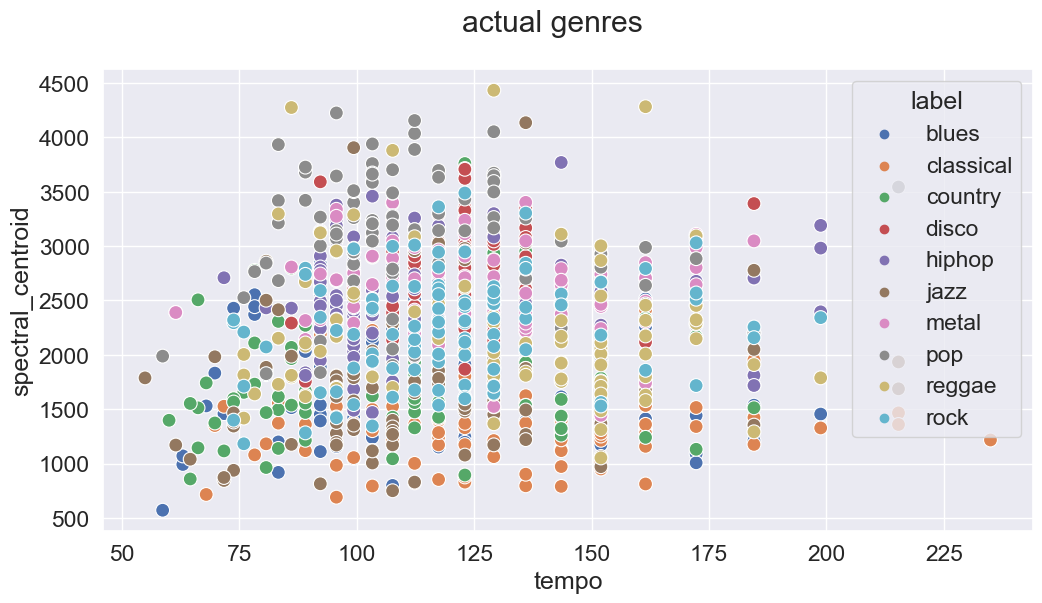

In [52]:
sns.scatterplot(data=df, x='tempo', y='spectral_centroid', hue='label', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('actual genres')

# Kaggle data set for predicting music genres with dancability (haha)

In [72]:
import pandas as pd

# using the kaggle csv
df = pd.read_csv('music_genre.csv')
df = df.dropna()
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


Text(0.5, 0, 'idx')

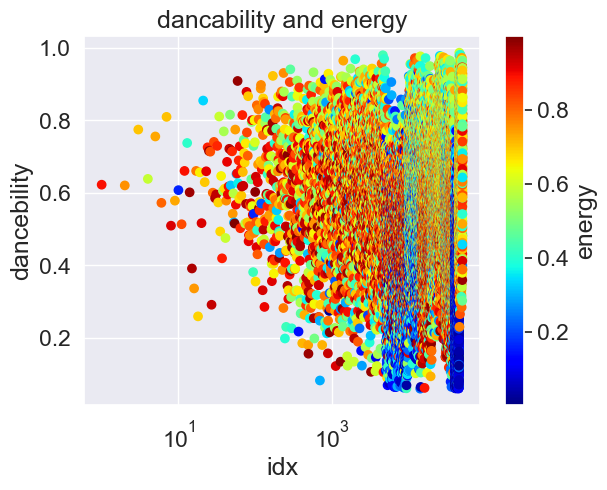

In [73]:
x_lin = df.loc[:, 'danceability'].values
y_lin = df.loc[:, 'energy'].values
pos = [i for i in range(len(x_lin))]
# plt.plot(x_lin, label = 'danceability')
# plt.plot(y_lin, label = 'energy')

plt.scatter(pos, x_lin, c=y_lin, cmap='jet')
plt.title("dancability and energy")
plt.colorbar(cmap='jet', label='energy')
plt.xscale('log')
plt.ylabel('dancebility')
plt.xlabel('idx')

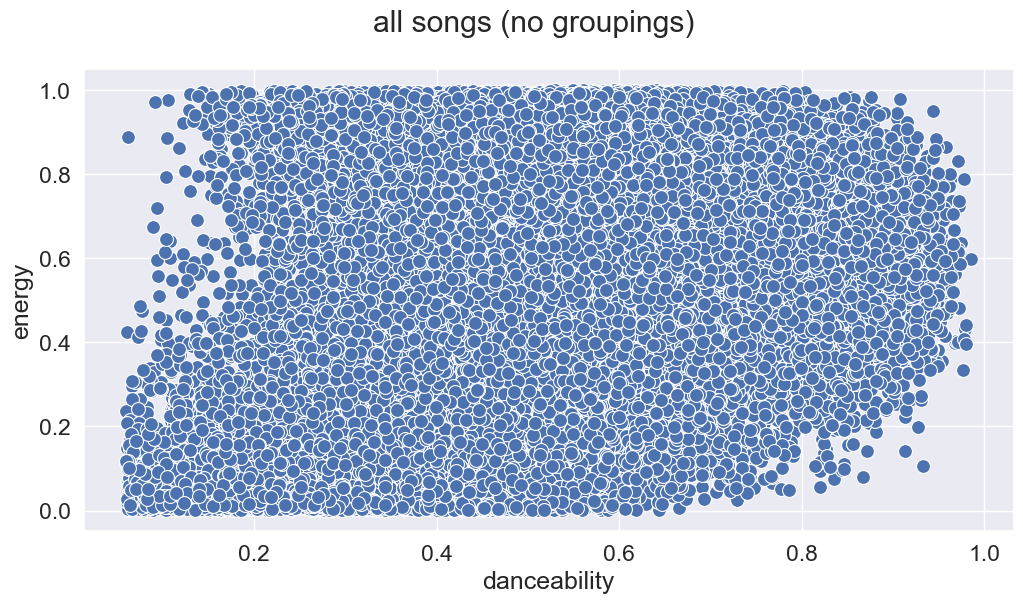

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)

# df_penguin = sns.load_dataset('penguins')
# df_penguin.dropna(axis=0, how='any', inplace=True)

sns.scatterplot(data=df, x='danceability', y='energy', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('all songs (no groupings)');

c:\Users\alina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\alina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\alina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\alina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Text(0.5, 0.98, 'Change in mean distance from cluster per k value')

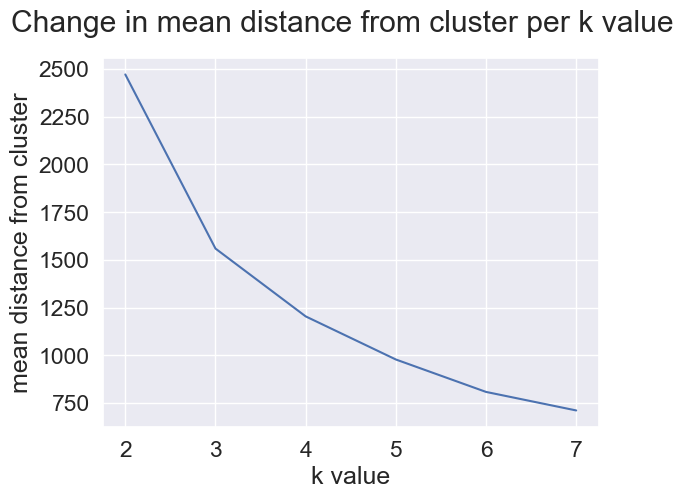

In [75]:
from sklearn.cluster import KMeans
n_clusters = 3

x_feat_list = ['danceability', 'energy']
x = df.loc[:, x_feat_list].values

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)

# keys are k (number of clusters), values are mean_d (mean distance
# from each sample to its cluster centroid)
mean_d_dict = dict()
for n_clusters in range(2, 8):
    # fit kmeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)    
        
    # compute & store mean distance
    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d

plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.ylabel("mean distance from cluster")
plt.xlabel("k value")
plt.suptitle("Change in mean distance from cluster per k value") 

In [76]:
# k in k-means describes the number of clusters
n_clusters = 5

# extract x features (define distance between samples)
x_feat_list = ['danceability', 'energy']
x = df.loc[:, x_feat_list].values

# perform clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
y = kmeans.predict(x)

c:\Users\alina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0.5, 0.98, 'clusters of songs (similar beats and spectral bandwidth)')

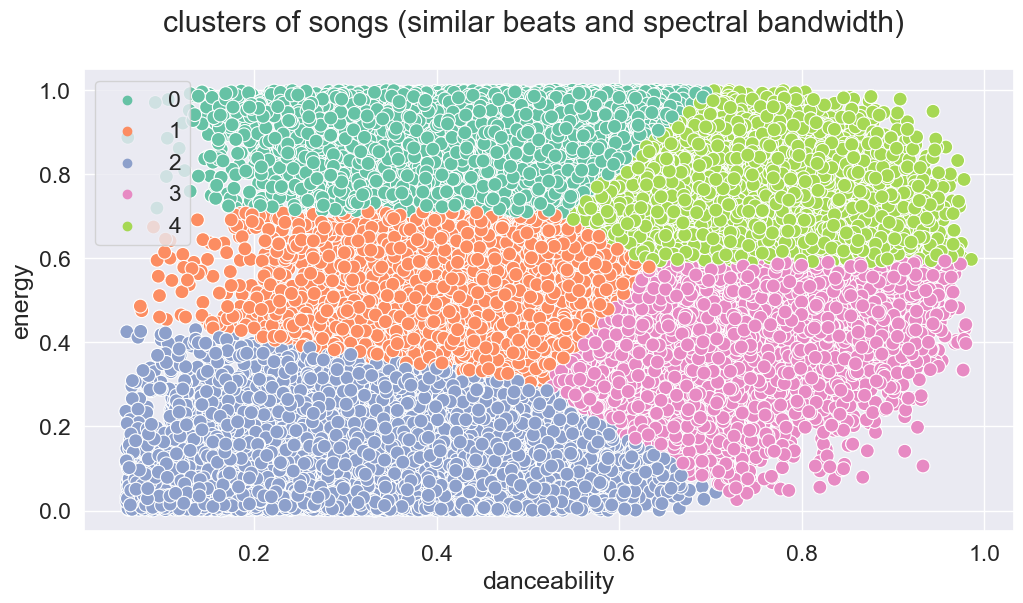

In [77]:
sns.scatterplot(data=df, x='danceability', y='energy', s=100, hue=y, palette='Set2')
plt.gcf().set_size_inches(12, 6)
plt.suptitle('clusters of songs (similar beats and spectral bandwidth)')

Text(0.5, 0.98, 'actual genres')

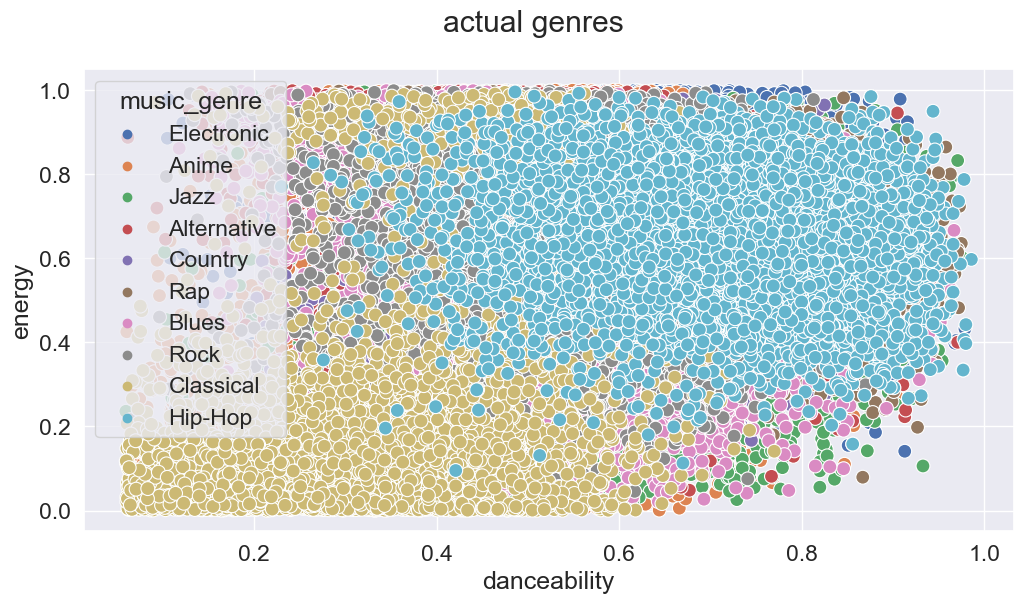

In [78]:
sns.scatterplot(data=df, x='danceability', y='energy', hue='music_genre', s=100)
plt.gcf().set_size_inches(12, 6)
plt.suptitle('actual genres')